## 1.1 Загрузка данных

In [1]:
# импорт необходимых модулей
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# загрузка дата-фрейма
df = pd.read_table('SOP2.txt',encoding='windows-1250', skiprows = [0], header = None, sep = ' ').astype('int')
df.columns = ['шаг','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']

# смотрим пустые значения и типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   шаг     1039 non-null   int32
 1   1       1039 non-null   int32
 2   2       1039 non-null   int32
 3   3       1039 non-null   int32
 4   4       1039 non-null   int32
 5   5       1039 non-null   int32
 6   6       1039 non-null   int32
 7   7       1039 non-null   int32
 8   8       1039 non-null   int32
 9   9       1039 non-null   int32
 10  10      1039 non-null   int32
 11  11      1039 non-null   int32
 12  12      1039 non-null   int32
 13  13      1039 non-null   int32
 14  14      1039 non-null   int32
 15  15      1039 non-null   int32
 16  16      1039 non-null   int32
dtypes: int32(17)
memory usage: 69.1 KB


## 1.2 Предварительное изучение

Производим анализ переменных в табличном виде (максимальное, минимальное значение, среднеквадратичное отклонение, медиана, квартили) 

In [2]:
df.describe()

,шаг,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,520.000000,0.623677,4.682387,11.102984,14.403272,68.232916,72.699711,0.738210,1.178056,41.561116,54.715111,4.525505,26.093359,61.685274,49.018287,5.670837,19.400385
std,300.077768,4.661350,17.853913,33.781258,47.885602,64.115154,68.435998,7.310799,7.571118,54.114379,70.420808,17.918007,46.546100,58.428258,68.052093,12.710252,24.494336
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,260.500000,0.000000,0.000000,0.000000,0.000000,13.000000,5.000000,0.000000,0.000000,8.000000,9.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000
50%,520.000000,0.000000,0.000000,0.000000,0.000000,53.000000,59.000000,0.000000,0.000000,24.000000,31.000000,0.000000,8.000000,47.000000,16.000000,0.000000,13.000000
75%,779.500000,0.000000,0.000000,1.000000,0.000000,104.500000,118.000000,0.000000,0.000000,49.000000,66.000000,0.000000,31.000000,101.000000,76.000000,4.000000,28.000000
max,1039.000000,47.000000,115.000000,255.000000,255.000000,255.000000,255.000000,152.000000,84.000000,255.000000,255.000000,147.000000,255.000000,239.000000,255.000000,93.000000,203.000000


## 1.2.1 Анализ ТЗ

In [3]:
df

,шаг,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,0,0,175,12,0,0,0,0,255,112,0,0,233,173,2,23
1,2,0,0,159,10,10,0,0,0,255,108,0,0,222,173,10,34
2,3,0,0,139,25,48,0,0,0,255,145,0,0,230,175,18,18
3,4,0,0,130,54,61,0,0,0,255,216,0,1,237,185,52,22
4,5,0,0,110,54,57,0,0,0,236,207,3,4,239,205,43,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,1035,0,0,0,0,0,0,0,0,0,79,0,28,166,4,0,21
1035,1036,0,0,0,17,0,0,0,0,4,123,0,48,163,16,14,2
1036,1037,0,0,0,17,2,0,0,0,9,122,0,34,125,31,0,11
1037,1038,0,0,0,11,26,0,11,0,0,110,0,27,132,42,0,2


Структурируем данные ТЗ для лучшего понимания задачи.

В ТЗ сказано, что из 16 представленных сигналов:
- 10 основные, из них:
    - 8 сигналов определяют продольные дефекты, из них:
        - 4 эхо сигналов, судя по схеме это:
            1. Г0 - У0 (А) - 13 строка таблицы, раздельно-совмещенная схема
            2. Г2 - У2 (Б) - 14 строка таблицы, раздельно-совмещенная схема
            3. Г5 - У5 (А) - 3 строка таблицы, хордовая схема
            4. Г6 - У6 (Б) - 4 строка таблицы, хордовая схема
        - 4 теневых сигнала, судя по схеме это:
            1. Г6 - У5 (Б - А) - 1 строка таблицы, хордовая схема
            2. Г5 - У6 (А - Б) - 2 строка таблицы, хордовая схема
            3. Г2 - У3 (Б - А) - 11 строка таблицы, раздельно-совмещенная схема
            4. Г3 - У0 (Б - А) - 12 строка таблицы, раздельно-совмещенная схема
    - 2 эхо сигнала определяют поперечные дефекты, из них:
          1. Г2 - У0 (Б - А) - 6 строка таблицы, хордовая схема
          2. Г0 - У2 (А - Б) - 5 строка таблицы, хордовая схема
- 6 повторяющиеся (эхо) с усилением +6 дБ

Графическая характеристика сигналов:
- эхо-сигнал в случае отсутствия дефекта = 0, при обнаружении дефекта на графике наблюдается всплеск.
- теневой сигнал в случае отсутствия дефекта = 255, при обнаружении дефекта на графике наблюдается провал.

Также указано, что уровень изменения сигнала зависит от высоты дефекта. В ТЗ приведен пример падения сигнала (теневой метод):
- 255 -> 245 (дельта = 10) = 2 мм высота дефекта
- 255 -> 235 (дельта = 20) = 3 мм высота дефекта 
- 255 -> 5 (дельта = 200) = 8 мм высота дефекта 

Таким образом, даны 3 точки, построим график зависимости:

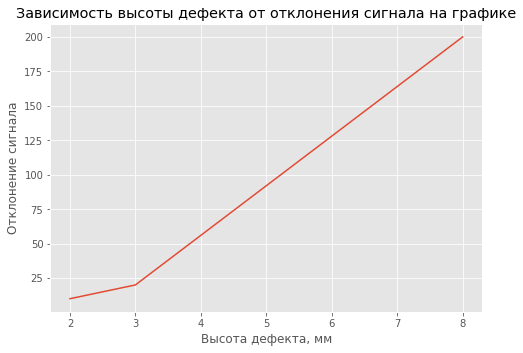

In [10]:
matplotlib.style.use('ggplot')

graph = plt.figure()
axes = graph.add_axes([0, 0, 1, 1])
axes.set_xlabel('Высота дефекта, мм')
axes.set_ylabel('Отклонение сигнала')
axes.set_title('Зависимость высоты дефекта от отклонения сигнала на графике')
axes.plot([2, 3, 8], [10, 20, 200]) 

Зависимость нелинейная.
При помощи МНК получаем квадратичную функцию:
Отклонение сигнала = 4.33 * Высота дефекта **2 - 11.66 * Высота дефекта + 16

Поскольку сигналы сильно зашумлены, для более наглядного представления попробуем восстановить идеальный эхо и теневой сигнал (без шумов) по полученной квадратичной зависимости и данных о высоте дефектов в файле target2.csv.

In [7]:
# создание датафрейма с целевой переменной
df_temp = pd.read_csv('target2.csv')

# переформатируем датафрейм с целевой переменной (приведем к единой размерности с датафреймом сигналов = 1040 строк)
df2 = pd.DataFrame(columns = ['шаг', 'высота дефекта', 'тип дефекта', 'cторона', \
                   'восстановленный эхо А', 'восстановленный эхо Б', \
                   'восстановленный теневой А', 'восстановленный теневой Б']).astype('int')

for y in range(len(df)):
    exist = 0

    for x in range(len(df_temp) - 1): # удаляем последнюю строку с поперечным дефектом, без стороны
        if y >= df_temp.iloc[x, 0] - 50 and y < df_temp.iloc[x, 0] - 50 + df_temp.iloc[x, 1]: #сдвигаем на -50 от начала координат
            exist = 1
            temp_x = x
            break

    if exist > 0:  # на шаге y есть дефект
        delta_s = 4.33 * df_temp.iloc[temp_x, 2]**2 - 11.66 * df_temp.iloc[temp_x, 2] + 16 # считаем отклонения идеального сигнала
        df2.loc[y] = [y, df_temp.iloc[temp_x, 2], \
                      1 if df_temp.iloc[temp_x, 3] == 'L' else 2, \
                      1 if df_temp.iloc[temp_x, 4] == 'A' else 2, \
                      delta_s if df_temp.iloc[temp_x, 4] == 'A' else 0, \
                      delta_s if df_temp.iloc[temp_x, 4] == 'B' else 0, \
                      (255 - delta_s) if df_temp.iloc[temp_x, 4] == 'A' else 0, \
                      (255 - delta_s) if df_temp.iloc[temp_x, 4] == 'B' else 0]
  
    else:  # на шаге y нет дефекта
        df2.loc[y] = [y, 0, 0, -1, 0, 0, 255, 255]

In [8]:
df_temp.iloc[1, 0]

,Начало дефекта,Длина дефекта,Высота дефекта,Тип дефекта,Сторона
0,178,37.0,6,L,B
1,258,38.0,4,L,A
2,337,53.0,5,L,B
3,822,37.0,5,L,B
4,957,48.0,5,L,A
5,123,NaN,3,T,


In [11]:
df_temp.iloc[2, 1]

53.0

## 1.2.2 Анализ данных в графическом виде

Построим графики зависимостей сигналов от шага движения устройства, гистограммы распределения и "ящики с усами".
Сигналы имеют диапазон от 0 до 255, поэтому для более реалистичного сопоставления сигналов зафиксируем ось y = 0...255.

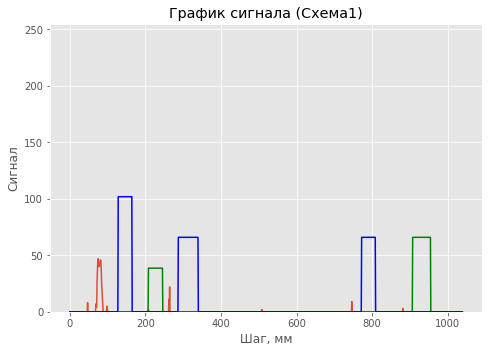

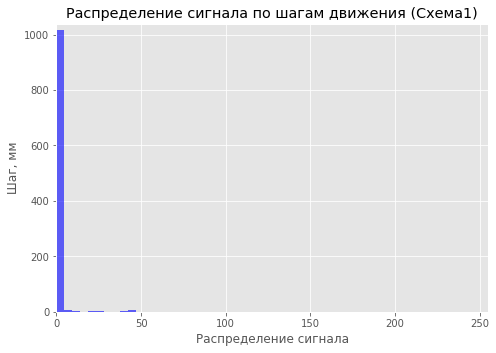

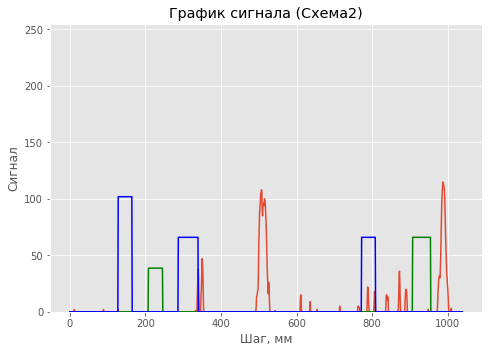

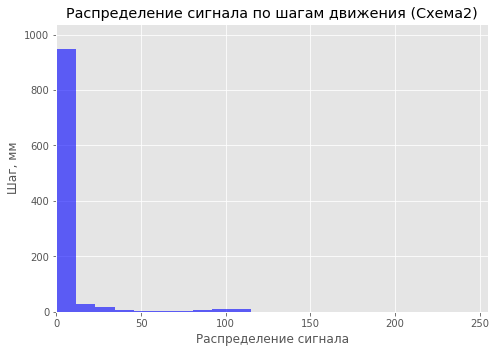

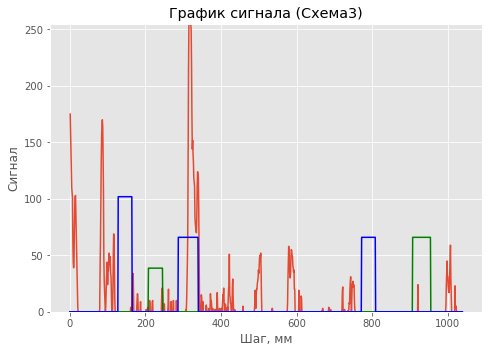

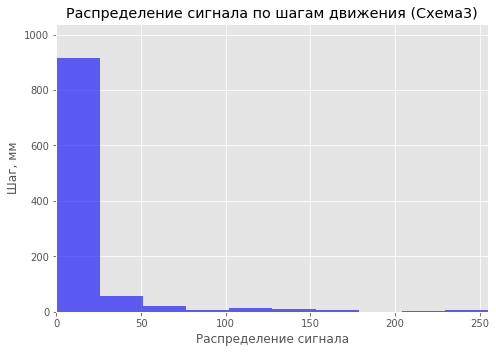

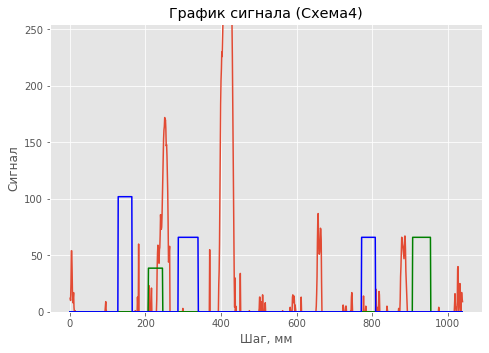

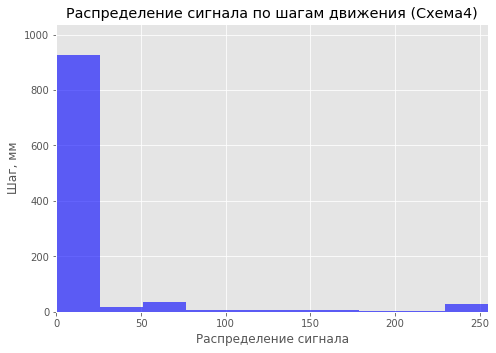

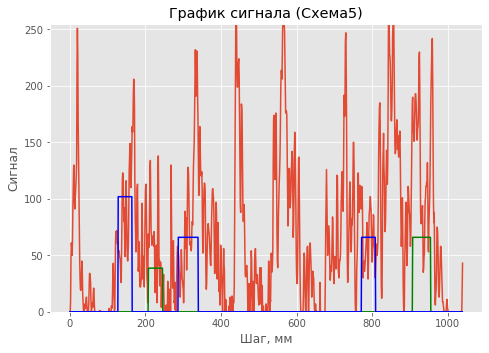

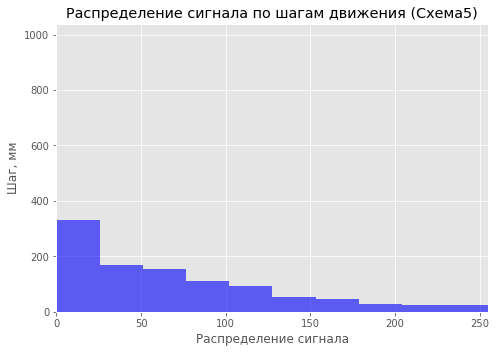

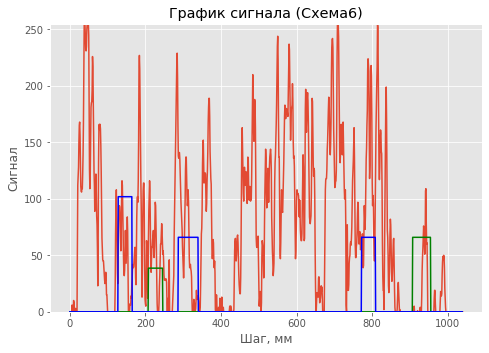

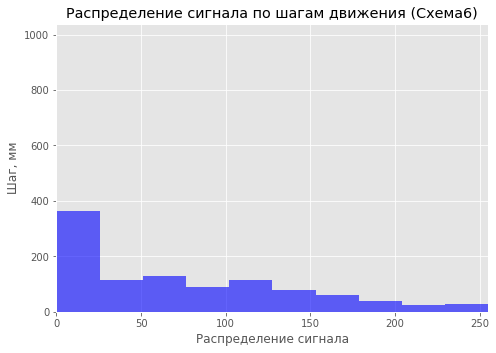

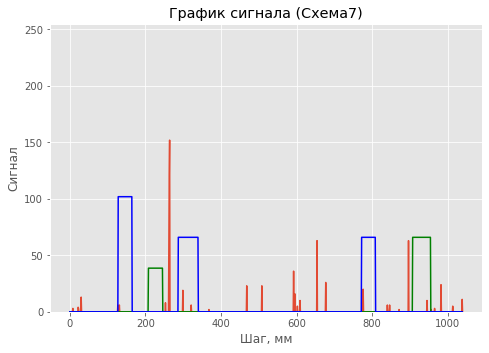

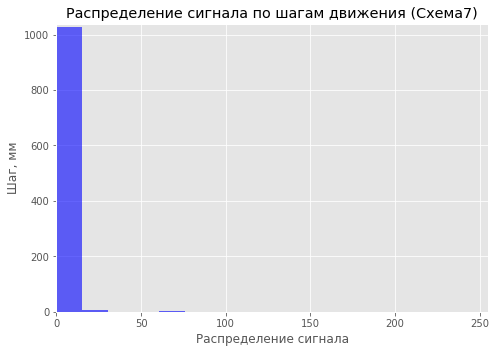

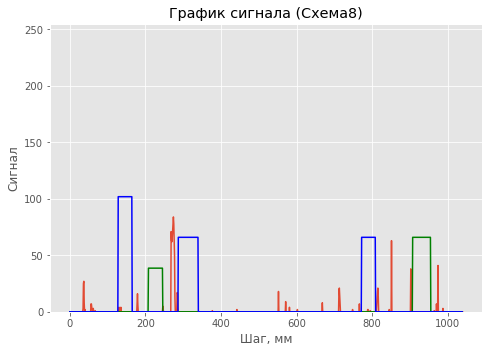

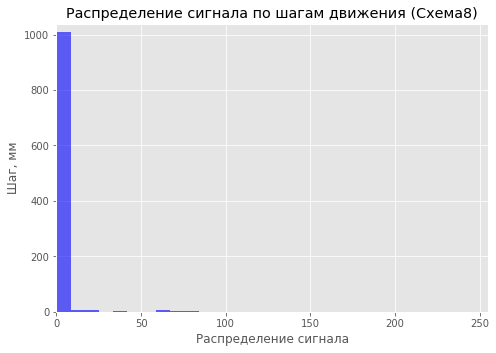

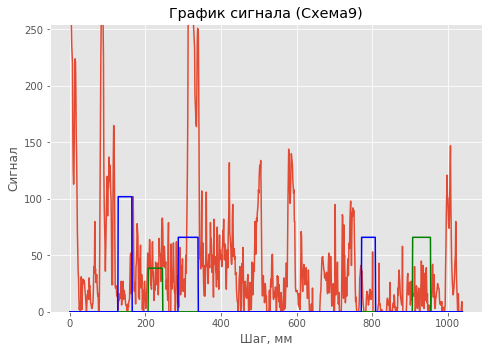

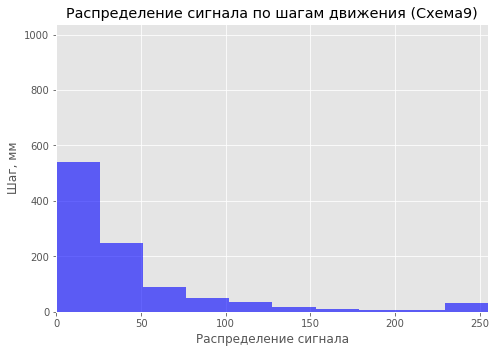

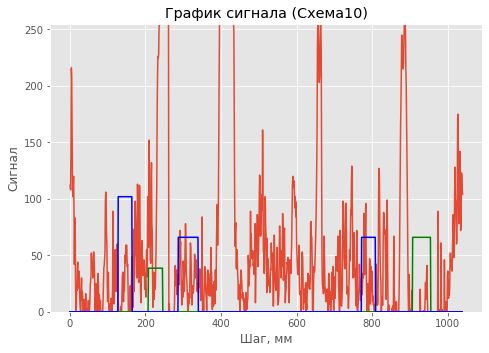

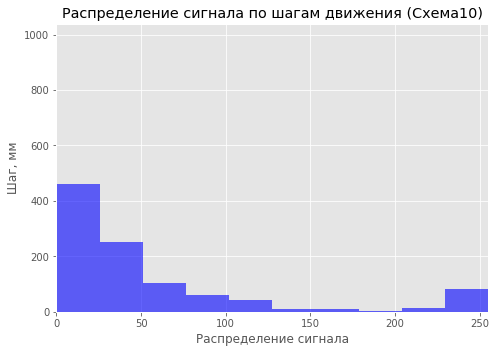

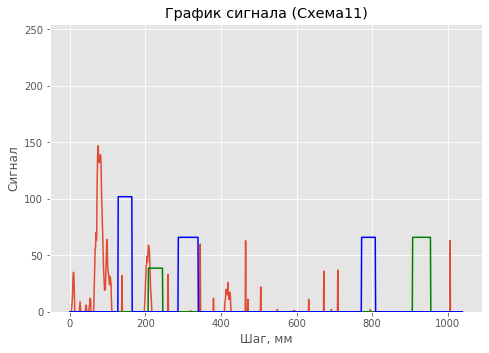

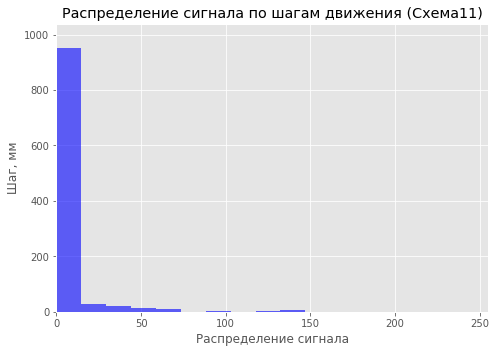

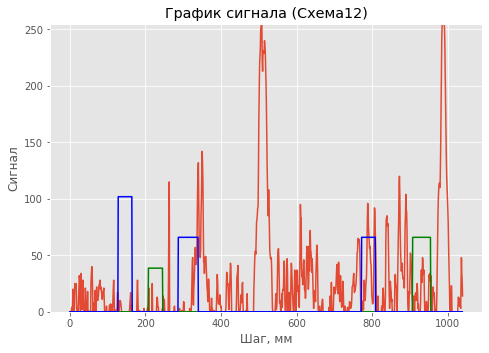

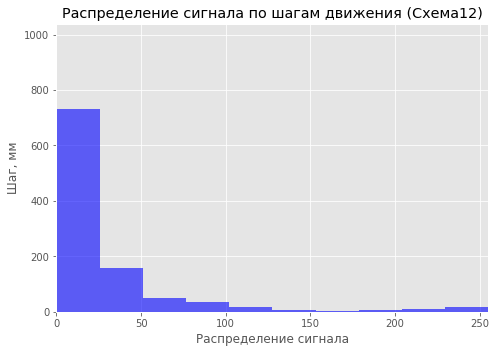

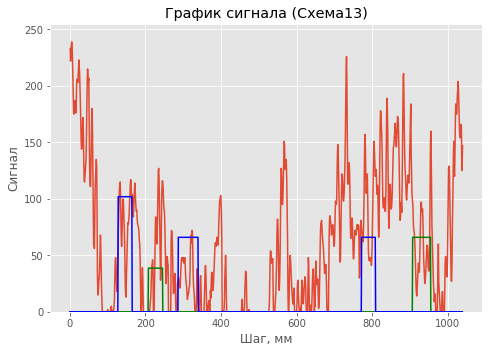

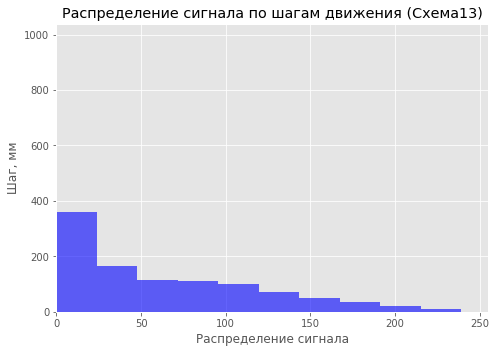

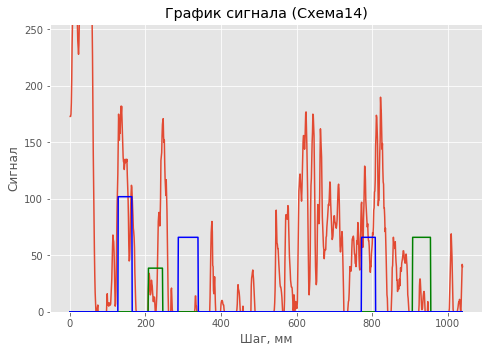

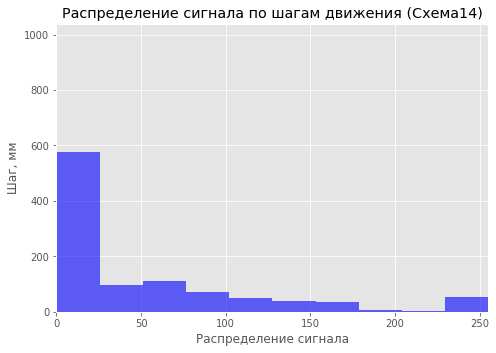

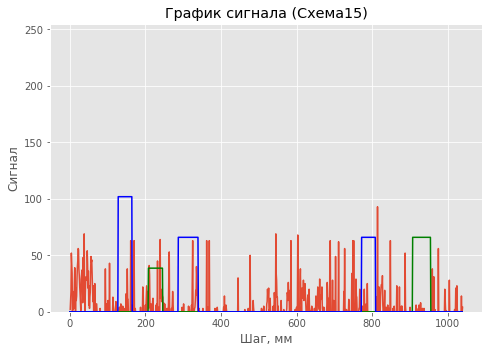

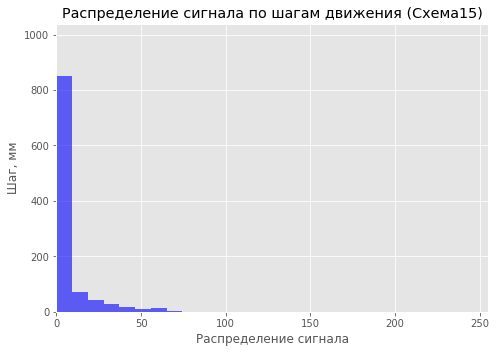

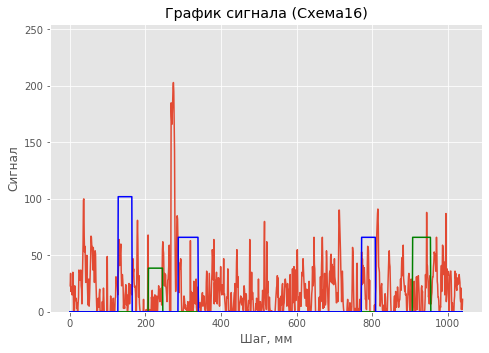

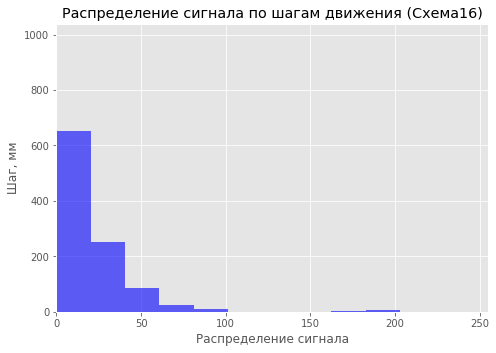

In [14]:
import warnings
warnings.filterwarnings('ignore')

for i in range(1, 17):

  # строим графики
  graph = plt.figure()
  axes = graph.add_axes([0, 0, 1, 1])
  axes.set_ylim([0, 255])
  axes.set_xlabel('Шаг, мм')
  axes.set_ylabel('Сигнал')
  axes.set_title('График сигнала (Схема' + str(i) + ')')
  axes.plot(df['шаг'], df[str(i)]) 

  # построим идеальные график эхо-сигнала для визуального сравнения и выявления эхо-графиков
  axes.plot(df2['шаг'], df2['восстановленный эхо А'], color = 'g') # дефекты на стороне А
  axes.plot(df2['шаг'], df2['восстановленный эхо Б'], color = 'b') # дефекты на стороне Б

  # строим гистограммы
  graph_hist = plt.figure()
  axes_hist = graph_hist.add_axes([0, 0, 1, 1])
  axes_hist.set_xlim([0, 255])
  axes_hist.set_ylim([0, len(df)])
  axes_hist.set_xlabel('Распределение сигнала')
  axes_hist.set_ylabel('Шаг, мм')
  axes_hist.set_title('Распределение сигнала по шагам движения (Схема' + str(i) + ')')
  axes_hist.hist(x = df[str(i)], color = 'b', alpha = 0.6)
  

Построим "ящики с усами"

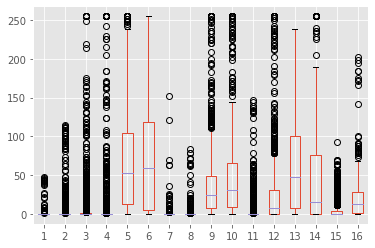

In [15]:
boxplot = df.boxplot(column = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'])

Построим матрицу корреляций, это поможет определить 6 повторяющихся сигналов с усиленной амплитудой +6 дБ. Перед построением матрицы примением сглаживание данных скользящим средним. Слишком большое окно может привести к потере данных, используем окно = 25.


<AxesSubplot:>

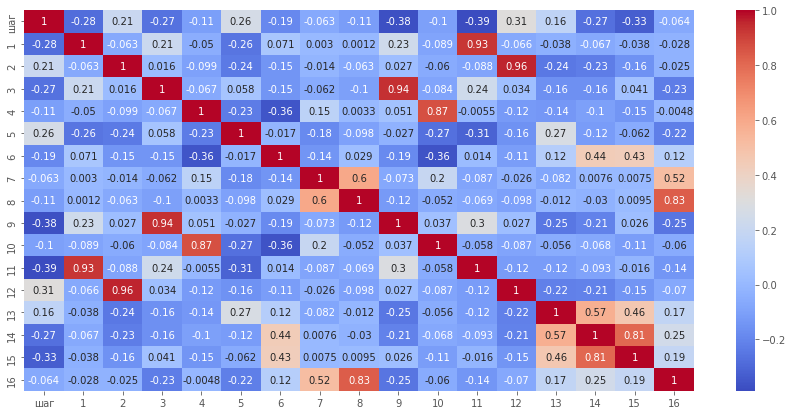

In [16]:
# сглаживание скользящим средним
rolling = df.rolling (window = 25)
rolling_mean = rolling.mean()

# корреляции
corr = rolling_mean.corr()

import seaborn as sns
fig, ax = plt.subplots(figsize = (15, 7))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', ax = ax)

Максимальные корреляции: 2 - 12, 3 - 9, 1 - 11, 4 - 10, 8 - 16, 14 - 15

## 1.3 Предварительное определение методов контроля

В ТЗ сказано, что 6 эхо-сигналов повторяются. Это одни и те же датчики, сдвига нет. Поэтому можем предположить, что наиболее коррелирующие сигналы - это те же сигналы с усилением +6 дБ. Насколько я понял, усиленные сигналы называются эхо-контактными.

Сопоставляя визуальный метод и метод с применением корреляций, определим методы УЗ контроля для каждого столбца исходных данных:

1 - эхо,
2 - эхо,
3 - эхо,
4 - эхо,
5 - теневой,
6 - теневой,
7 - теневой,
8 - эхо,
9 - эхо-контактный,
10 - эхо-контактный,
11 - эхо-контактный,
12 - эхо-контактный,
13 - теневой,
14 - эхо,
15 - эхо-контактный,
16 - эхо-контактный

# МОДУЛЬ B

## 2.1 Определение расстояния между схемами прозвучивания

В диагностическом устройстве группы датчиков расположены со смещением от начала координат. Первое смещение известно из ТЗ = 50 мм. Требуется определить второе смещение.
Самый простой и быстрый способ здесь – искать максимальную корреляцию, сдвигая часть измерений на шаг:

Напишем автоматическое определение расстояния между первым и вторым смещением датчиков.

In [21]:
repeat = False

if repeat:
  # избавляемся от изначально коррелирующих эхо-сигналов и от теневых сигналов, оставим только однотипные сигналы
    #(устойчивые эхо):
    df_temp = df[['9', '10', '11', '12', '16']]
    df_temp.columns = ['0','1','2','3','4']

    max_corr = 0

for i in range(5):
    df_temp['temp'] = df_temp[str(i)]
    for k in range(len(df_temp) - 1):
      for y in range(len(df_temp) - 1): # сдвигаем все сигналы на k += 1
        df_temp.loc[y, 'temp'] = df_temp.loc[y - k if y >= k else len(df_temp) - k + y, str(i)]

      corr_plus_temp = 0
      corr_minus_temp = 0
      for x in range(5): # считаем корреляцию сдвинутого столбца с остальными столбцами
        if x != i:
          # сглаживание скользящим средним
          rolling = df_temp['temp'].rolling (window = 25)
          rolling_mean = rolling.mean()
          # корреляции
          corr = rolling_mean.corr(df_temp[str(x)])
          if corr > 0.3:
            corr_plus_temp += corr
          elif corr < -0.3:
            corr_minus_temp += corr

      if corr_plus_temp > max_corr:
        max_corr = corr_plus_temp
        temp_k = k
      elif abs(corr_minus_temp) > max_corr:
        max_corr = abs(corr_minus_temp)
        temp_k = k

print('Максимальные корреляции преобладающих эхо-сигналов наблюдаются при сдвиге: ', temp_k, ' мм') # = 83 мм

KeyError: '0'

**Вывод:** расстояние между схемами прозвучивания = 83 мм.

Добавим в датасет сигналы с учётом сдвига и востановленные сигналы с учетом сдвига. Возможно, это поможет сопоставить сигналы с датчиками:

In [41]:
for i in range(1, 17):
  df[str(i) + ' (-83)'] = df[str(i)]
  for y in range(len(df)):
    df.loc[y, str(i) +' (-83)'] = df.loc[y - 83 if y >= 83 else len(df) - 83 + y, str(i)]  # поворачиваем значения в столбце по кругу на -83

df['восстановленный эхо А'] = df2['восстановленный эхо А']
df['восстановленный эхо Б'] = df2['восстановленный эхо Б']
df['восстановленный теневой А'] = df2['восстановленный теневой А']
df['восстановленный теневой Б'] = df2['восстановленный теневой Б']

df['восстановленный эхо А (-83)'] = df['восстановленный эхо А']
for y in range(len(df)):
  df.loc[y, 'восстановленный эхо А (-83)'] = df.loc[y - 83 if y >= 83 else len(df) - 83 + y, 'восстановленный эхо А']

df['восстановленный эхо Б (-83)'] = df['восстановленный эхо Б']
for y in range(len(df)):
  df.loc[y, 'восстановленный эхо Б (-83)'] = df.loc[y - 83 if y >= 83 else len(df) - 83 + y, 'восстановленный эхо Б']

df['восстановленный теневой А (-83)'] = df['восстановленный теневой А']
for y in range(len(df)):
  df.loc[y, 'восстановленный теневой А (-83)'] = df.loc[y - 83 if y >= 83 else len(df) - 83 + y, 'восстановленный теневой А']

df['восстановленный теневой Б (-83)'] = df['восстановленный теневой Б']
for y in range(len(df)):
  df.loc[y, 'восстановленный теневой Б (-83)'] = df.loc[y - 83 if y >= 83 else len(df) - 83 + y, 'восстановленный теневой Б']


Построим полную матрицу корреляций всех значений с учётом сдвигов:

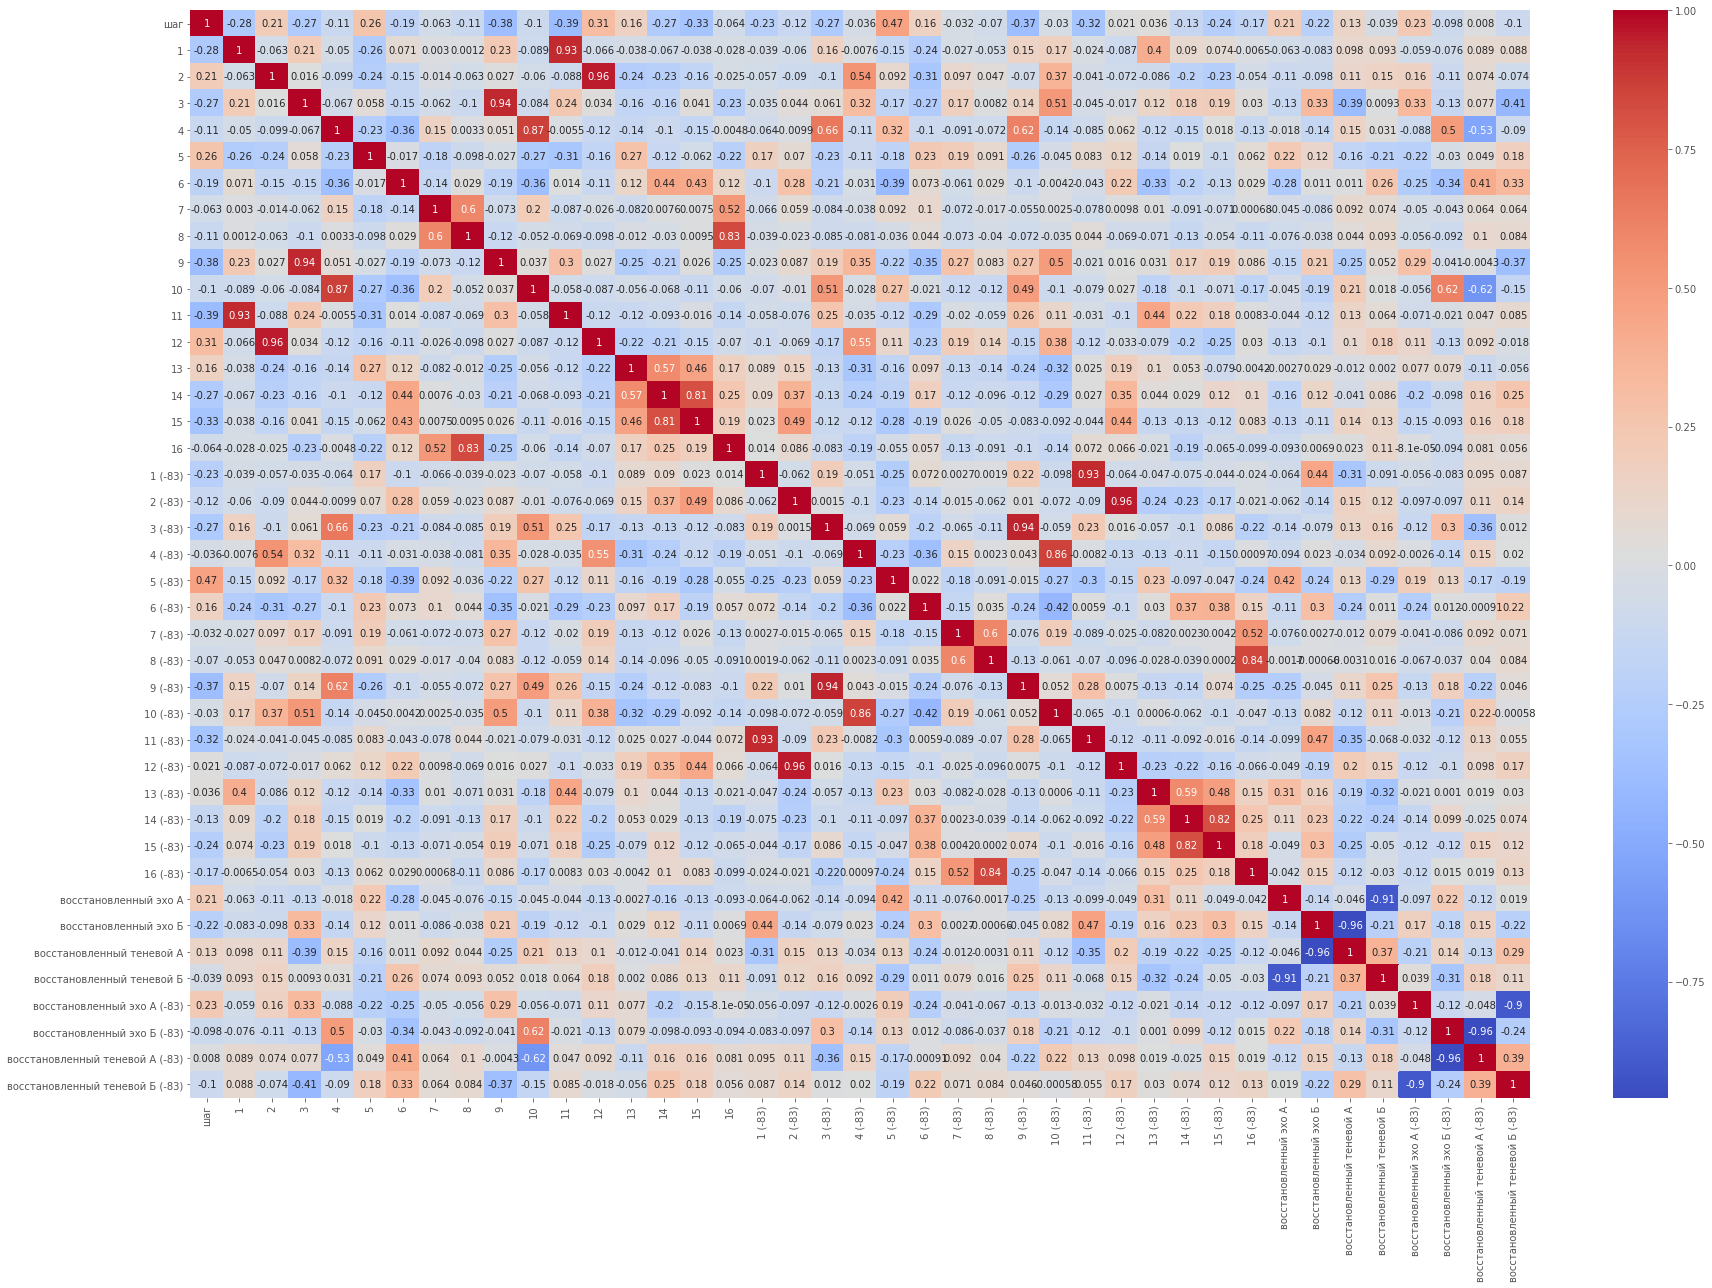

In [42]:
# сглаживание скользящим средним
rolling = df.rolling (window = 25)
rolling_mean = rolling.mean()

# корреляции
corr = rolling_mean.corr()

import seaborn as sns
fig, ax = plt.subplots(figsize = (30, 20))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', ax = ax)

**Делаем выводы:**

1. Наиболее высокий коэффициент корреляции имеют пары сигналов 2 - 12, 3 - 9, 1 - 11, 4 - 10, 8 - 16, 14 - 15. В ТЗ сказано, что 6 эхо-сигналов повторяются. Это одни и те же датчики, сдвига нет. Поэтому можем предположить, что наиболее коррелирующие сигналы - это те же сигналы с усилением +6 дБ.

2. Сигнал 3 = 9 имеет одинаковую корреляцию с восстановленным эхо сигналом на стороне А и Б = 0.33. Вероятно, датчик не находится непосредственно на стороне А или Б и определяет поперечные дефекты. 

3. Сигнал 4 = 10 имееет высокую корреляцию с восстановленным эхо на стороне Б со сдвигом - 83.

4. Сигнал 1 коррелирует с 13 со сдвигом = 0.4, вероятно между схемами 1 и 13 расстояние 83 мм

3. Сигнал 2 коррелирует с 4 (сторона А или Б, сдвиг -83) = 0.54, вероятно между схемами 2 и 4 расстояние 83 мм

6. Сигнал 7 имеет корреляцию с 8 и 16, вероятно, находятся на одной линии. Значит 5 и 6 теневые сигналы (методом исключения) - со сдвигом -83.

7. Сигнал 15 и 12 схемы находятся на расстоянии 83 мм -> 15 со сдвигом 83

8. Сигнал 8 не имеет явных корреляций по восстановленным сигналам. Значит методом исключения - без сдвига.


Распишем параметры каждого сигнала:


In [43]:
#1 = 11 - эхо (сторона А, сдвиг на -83) - вероятно это Г0-У0
#2 = 12 - эхо (сторона А, без сдвига) - вероятно это Г5-У5
#3 = 9 - эхо (сторона А, сдвиг -83) - вероятно это Г0-У2
#4 = 10 - эхо (сторона Б, сдвиг -83) - вероятно это Г2-У0
#8 = 16 - эхо (сторона Б, без сдвига) - вероятно это Г6-У6
#14 = 15 - эхо (сторона Б, сдвиг -83) - вероятно это Г2-У2

#5 - теневой (сдвиг на -83) - вероятно это Г3-У0
#6 - теневой (сдвиг на -83) - вероятно это Г2-У3
#7 - теневой (без сдвига) - вероятно это Г5-У6
#13 - теневой (без сдвига) - вероятно это Г6-У5

## 2.2 Определение схем прозвучивания

**Ранее на основе анализа ТЗ было определено:**

В ТЗ сказано, что из 16 представленных сигналов:
- 10 основные, из них:
    - 8 сигналов определяют продольные дефекты, из них:
        - 4 эхо сигналов, судя по схеме это:
            1. Г0 - У0 (А) - 13 строка таблицы, раздельно-совмещенная схема
            2. Г2 - У2 (Б) - 14 строка таблицы, раздельно-совмещенная схема
            3. Г5 - У5 (А) - 3 строка таблицы, хордовая схема
            4. Г6 - У6 (Б) - 4 строка таблицы, хордовая схема
        - 4 теневых сигнала, судя по схеме это:
            1. Г6 - У5 (Б - А) - 1 строка таблицы, хордовая схема
            2. Г5 - У6 (А - Б) - 2 строка таблицы, хордовая схема
            3. Г2 - У3 (Б - А) - 11 строка таблицы, раздельно-совмещенная схема
            4. Г3 - У0 (Б - А) - 12 строка таблицы, раздельно-совмещенная схема
    - 2 эхо сигнала определяют поперечные дефекты, из них:
          1. Г2 - У0 (Б - А) - 6 строка таблицы, хордовая схема
          2. Г0 - У2 (А - Б) - 5 строка таблицы, хордовая схема
- 6 повторяющиеся (эхо) с усилением +6 дБ

Сопоставляя данные таблицы 1 ТЗ и предположений о типах датчиков получим данные о сигналах:
1. - 13 строка таблицы, раздельно-совмещенная схема, продольные дефекты, сторона А
2. - 3 строка таблицы, хордовая схема, продольные дефекты, сторона А
3. - 5 строка таблицы, хордовая схема, поперечные дефекты, сторона А/Б
4. - 6 строка таблицы, хордовая схема, поперечные дефекты, сторона Б/А
5. - 12 строка таблицы, раздельно-совмещенная схема, продольные дефекты, сторона Б
6. - 11 строка таблицы, раздельно-совмещенная схема, продольные дефекты, сторона А
7. - 2 строка таблицы, хордовая схема, продольные и поперечные дефекты, сторона Б
8. - 4 строка таблицы, хордовая схема, продольные дефекты, сторона Б
9. - 9 строка таблицы, хордовая схема, поперечные дефекты, сторона А
10. - 10 строка таблицы, хордовая схема, поперечные дефекты, сторона Б
11. - 15 строка таблицы, раздельно-совмещенная схема, продольные дефекты, сторона А
12. - 7 строка таблицы, хордовая схема, продольные дефекты, сторона А
13. - 4 строка таблицы, хордовая схема, продольные дефекты, сторона Б
14. - 14 строка таблицы, раздельно-совмещенная схема, продольные дефекты, сторона Б
15. - 16 строка таблицы, раздельно-совмещенная схема, продольные дефекты, сторона Б
16. - 8 строка таблицы, хордовая схема, продольные дефекты, сторона Б

## 2.3 Приведение к общей координате

Дублирование и сдвиг всех столбцов уже было произведено на предыдущем этапе. Сейчас необходимо только почистить лишние данные. Некоторые столбцы оставить со сдвигом, некоторые без сдвига

In [16]:
# удалим коррелирующие столбцы (без усиления сигнала) в парах 2 - 12, 3 - 9, 1 - 11, 4 - 10, 8 - 16, 14 - 15:
# остаются 5 (сдвиг), 6 (сдвиг), 7, 9 (сдвиг), 10 (сдвиг), 11 (сдвиг), 12, 13, 15 (сдвиг), 16
# противоположные столбцы также удаляем
# UPD: 7 признак можно удалить, т.к. он не имеет важности для моделей Градиентного бустинга и Случайного леса

X = df[['5 (-83)', '6 (-83)', '9 (-83)', '10 (-83)', '11 (-83)', '12', '13', '15 (-83)', '16']]
y = pd.Series(df2['cторона']) # в задании указана целевая переменная - Сторона дефекта

In [20]:
df2[270:330]

,шаг,высота дефекта,тип дефекта,cторона,восстановленный эхо А,восстановленный эхо Б,восстановленный теневой А,восстановленный теневой Б
270,270.0,0.0,0.0,-1.0,0.0,0.00,255.0,255.00
271,271.0,0.0,0.0,-1.0,0.0,0.00,255.0,255.00
272,272.0,0.0,0.0,-1.0,0.0,0.00,255.0,255.00
273,273.0,0.0,0.0,-1.0,0.0,0.00,255.0,255.00
274,274.0,0.0,0.0,-1.0,0.0,0.00,255.0,255.00
275,275.0,0.0,0.0,-1.0,0.0,0.00,255.0,255.00
276,276.0,0.0,0.0,-1.0,0.0,0.00,255.0,255.00
277,277.0,0.0,0.0,-1.0,0.0,0.00,255.0,255.00
278,278.0,0.0,0.0,-1.0,0.0,0.00,255.0,255.00
279,279.0,0.0,0.0,-1.0,0.0,0.00,255.0,255.00


# МОДУЛЬ С

## 3.1 Разбиение данных на обучающую и тестовую выборки

Применяем кросс-валидацию как наиболее эффективный метод оценки  выбранной модели


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100) 

X_train.shape, y_train.shape
X_test.shape, y_test.shape

NameError: name 'X' is not defined

## 3.2 Аргументированный выбор модели классификации

Количество элементов в датасете: 1039. Задача мультиклассовой классификации: нет дефекта, есть дефект на стороне А, есть дефект на стороне Б. Сигналы с датчиков сильно зашумлены, поэтому для классификации рассмотрим 3 алгоритма, которые хорошо справляются с выбросами:
1. Градиентный бустинг
2. Random Forest
3. Метод опорных векторов SVM с обучением градиентным спуском (SGD)


## 3.2.1 Градиентный бустинг


In [102]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

#  Метрики качества модели
print('Основные метрики качества на test:')
print("Accuracy: %.2f" % metrics.accuracy_score(y_pred, y_test))
print("Precision: %.2f" % metrics.precision_score(y_pred, y_test, average='macro'))
print("Recall: %.2f" % metrics.recall_score(y_pred, y_test, average='macro'))
print("F1: %.2f" % metrics.f1_score(y_pred, y_test, average='macro'))
print()

print('Матрица ошибок:')
print(metrics.confusion_matrix(y_pred, y_test))

Основные метрики качества на test:
Accuracy: 0.89
Precision: 0.70
Recall: 0.89
F1: 0.77

Матрица ошибок:
[[160   9  11]
 [  1  11   0]
 [  2   0  14]]


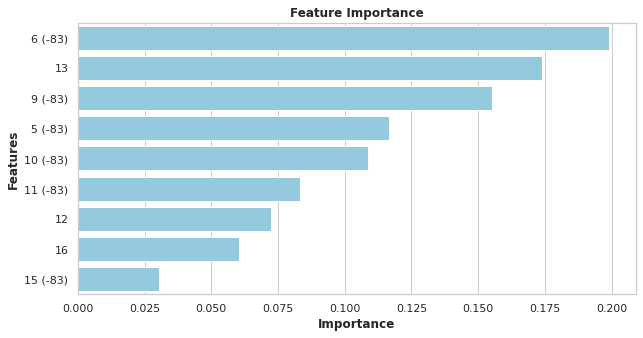

None

,Features,Gini-Importance
0,6 (-83),0.199125
1,13,0.174068
2,9 (-83),0.155286
3,5 (-83),0.116570
4,10 (-83),0.108844
5,11 (-83),0.083199
6,12,0.072267
7,16,0.060221
8,15 (-83),0.030420


In [105]:
#Отображение важности признаков
feats = {}
for feature, importance in zip(X.columns, clf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.0)
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=12, weight = 'bold')
plt.ylabel('Features', fontsize=12, weight = 'bold')
plt.title('Feature Importance', fontsize=12, weight = 'bold')
display(plt.show())
display(importances)

##3.2.2 Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=50, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

#  Метрики качества модели
print('Основные метрики качества на test:')
print("Accuracy: %.2f" % metrics.accuracy_score(y_pred, y_test))
print("Precision: %.2f" % metrics.precision_score(y_pred, y_test, average='macro'))
print("Recall: %.2f" % metrics.recall_score(y_pred, y_test, average='macro'))
print("F1: %.2f" % metrics.f1_score(y_pred, y_test, average='macro'))
print()

print('Матрица ошибок:')
print(metrics.confusion_matrix(y_pred, y_test))

Основные метрики качества на test:
Accuracy: 0.87
Precision: 0.63
Recall: 0.89
F1: 0.71

Матрица ошибок:
[[161  11  14]
 [  1   9   0]
 [  1   0  11]]


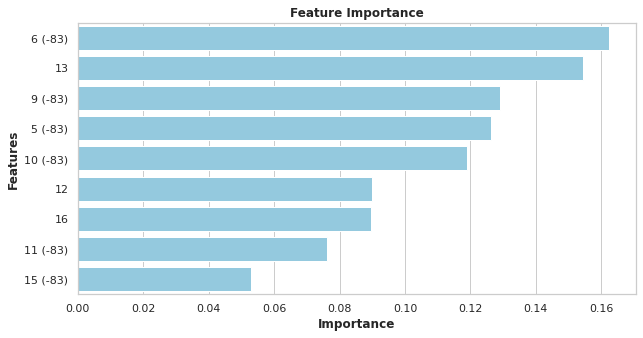

None

,Features,Gini-Importance
0,6 (-83),0.162456
1,13,0.154415
2,9 (-83),0.129054
3,5 (-83),0.126418
4,10 (-83),0.119040
5,12,0.089905
6,16,0.089720
7,11 (-83),0.076036
8,15 (-83),0.052955


In [107]:
#Отображение важности признаков
feats = {}
for feature, importance in zip(X.columns, clf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.0)
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=12, weight = 'bold')
plt.ylabel('Features', fontsize=12, weight = 'bold')
plt.title('Feature Importance', fontsize=12, weight = 'bold')
display(plt.show())
display(importances)

## 3.2.3 Метод опорных векторов SVM с обучением градиентным спуском (SGD)

In [108]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

#  Метрики качества модели
print('Основные метрики качества на test:')
print("Accuracy: %.2f" % metrics.accuracy_score(y_pred, y_test))
print("Precision: %.2f" % metrics.precision_score(y_pred, y_test, average='macro'))
print("Recall: %.2f" % metrics.recall_score(y_pred, y_test, average='macro'))
print("F1: %.2f" % metrics.f1_score(y_pred, y_test, average='macro'))
print()

print('Матрица ошибок:')
print(metrics.confusion_matrix(y_pred, y_test))

Основные метрики качества на test:
Accuracy: 0.87
Precision: 0.63
Recall: 0.89
F1: 0.71

Матрица ошибок:
[[161  11  14]
 [  1   9   0]
 [  1   0  11]]


## Выводы

Были опробованы 3 классификатора:
1. Градиентный бустинг
2. Random Forest
3. Метод опорных векторов SVM с обучением градиентным спуском (SGD)




*  Random Forest и SVM показали идентичные результаты (Accuracy: 0.87, Precision: 0.63, Recall: 0.89, F1: 0.71)
*  Градиентный бустинг ожидаемо справился немного эффективнее, чем другие алгоритмы (Accuracy: 0.89, Precision: 0.70, Recall: 0.89, F1: 0.77)
*  Окончательно выбираем **Градиентный бустинг.**



**Что можно улучшить:**
1.   Добавить синтетические фичи
2.   Попробовать избавиться от выбросов

